### Non-parametric embedding with UMAP. 
This notebook shows an example of a non-parametric embedding using the same training loops as are used with a parametric embedding. 

### load data

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

### create parametric umap model

In [5]:
from umap.parametric_umap import parametricUMAP

In [6]:
embedder = parametricUMAP(parametric_embedding=False, verbose=True)

In [7]:
embedding = embedder.fit_transform(train_images)

parametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa94d08b978>,
               parametric_embedding=False)
Construct fuzzy simplicial set
Sun Aug 16 18:34:39 2020 Finding Nearest Neighbors
Sun Aug 16 18:34:39 2020 Building RP forest with 17 trees
Sun Aug 16 18:34:41 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Sun Aug 16 18:34:52 2020 Finished Nearest Neighbor Search
Sun Aug 16 18:34:54 2020 Construct embedding
Epoch 1/10
100/100 [==============================] - 23s 234ms/step - loss: 0.0492
Epoch 2/10
100/100 [==============================] - 22s 216ms/step - loss: 0.0359
Epoch 3/10
100/100 [==============================] - 21s 214ms/step - loss: 0.0333
Epoch 4/10
100/100 [==============================] - 21s 214ms/step - loss: 0.0320
Epoch 5/10
100/100 [==============================] - 22s 220ms/step - loss: 0.0312
Epoch 6/10
100/100 [==============================] - 22s 222ms/step - loss:

### plot results

In [8]:
import matplotlib.pyplot as plt

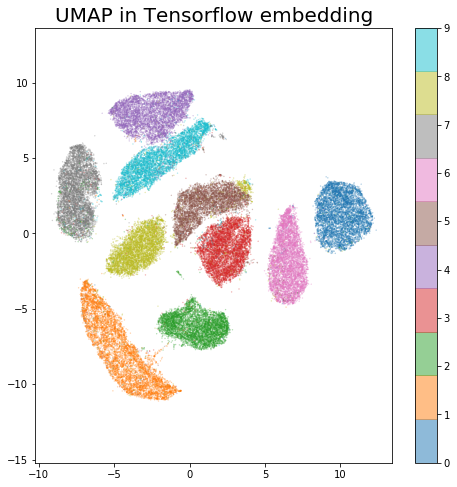

In [9]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [12]:
embedder._history.keys()

dict_keys(['loss'])

Text(0.5, 0, 'Epoch')

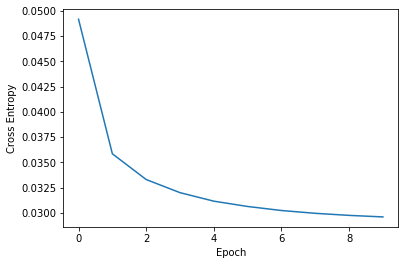

In [14]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')